# ***Problem Description***
The dataset aims to explore the relationship between different factors and the levels of stress/depression among individuals. We have one target variable and 3 features.The target variable is a numerical representation of stress or depression levels, while the input variables are:

- ***1.Lack of Work-Life Balance***: Measured on a scale from 1 to 10, where 1 indicates excellent balance and 10 indicates severe imbalance.

- ***2.Unhealthy Food***: A scale from 1 to 10 representing the quality of diet, where 1 is very healthy and 10 is very unhealthy.

- ***3.Financial Constraints:*** Rated from 1 to 10, where 1 signifies no financial issues and 10 signifies extreme financial stress.

- ***4.Sleeplessness/Insomnia:*** A scale from 1 to 10, where 1 indicates good sleep and 10 indicates severe insomnia.

This dataset consists of 50 entries, representing various hypothetical individuals, allowing for the analysis of how these lifestyle factors correlate with stress or depression levels.

***

## ***Importing Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.model_selection import train_test_split


## ***Displaying the data***

In [ ]:
df=pd.read_csv("/content/Stress_Depression.csv.csv")

In [ ]:
df.head(7)

,Lack of Work-Life Balance,Unhealthy Food,Financial Constraints,Sleeplessness/Insomnia,Stress/Depression Level
0,7.5,8.2,5.1,6.4,7.3
1,4.0,6.5,4.3,5.7,5.1
2,9.1,7.3,8.5,9.2,8.6
3,3.2,5.0,3.0,2.1,4.0
4,6.8,9.0,7.8,8.5,8.4
5,5.4,6.2,2.7,3.6,4.5
6,8.7,7.9,9.3,9.5,9.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Lack of Work-Life Balance  51 non-null     float64
 1   Unhealthy Food             51 non-null     float64
 2   Financial Constraints      51 non-null     float64
 3   Sleeplessness/Insomnia     51 non-null     float64
 4   Stress/Depression Level    51 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


### ***INSIGHTS FROM DATASET***
- Our data has no null value
- It has 5 columns (4 input features and 1 target variable)
- It has 50 entries
***

## ***EXPLORATORY DATA ANALYSIS***

In [ ]:
# Converting the features and target variable into numpy array and saving them in relevant variables

In [ ]:
Work_Life=np.array(df['Lack of Work-Life Balance'])

In [ ]:
Unhealthy_Food=np.array(df['Unhealthy Food'])

In [ ]:
financial_constraints=np.array(df['Financial Constraints'])

In [ ]:
Sleeplessness_Insomnia	=np.array(df['Sleeplessness/Insomnia'])

In [ ]:

Stress_Depression_Level=np.array(df['Stress/Depression Level'])

## ***Visualizing the correlation between feature variable "Work life balance" and target variable "Stress/Depression level"***

Text(0.5, 1.0, 'Work Life Balance vs Stress/Depression Level')

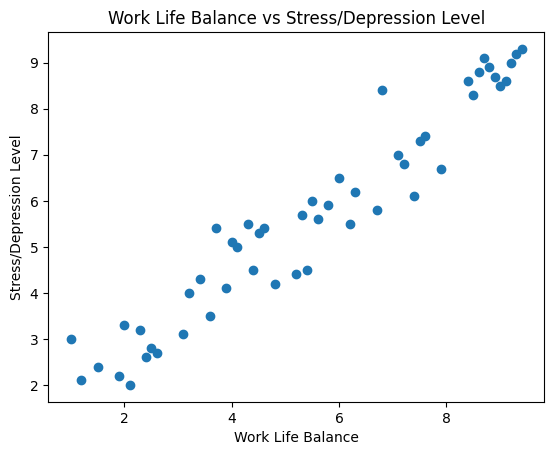

In [ ]:
plt.scatter(Work_Life,Stress_Depression_Level)
plt.xlabel("Work Life Balance")
plt.ylabel("Stress/Depression Level")
plt.title("Work Life Balance vs Stress/Depression Level")

### ***INSIGHTS FROM SCATTER PLOT***
- The scatter plot of Work-Life balance vs Stress/Depression Level shows a strong positive correlation between the two variables. This means that individuals with a higher lack of work-life balance tend to have higher levels of stress or depression.
***

## ***Visualizing the correlation between feature variable "Unhealthy food" and target variable "Stress/Depression level"***

Text(0.5, 1.0, 'Unhealthy Food vs Stress/Depression Level')

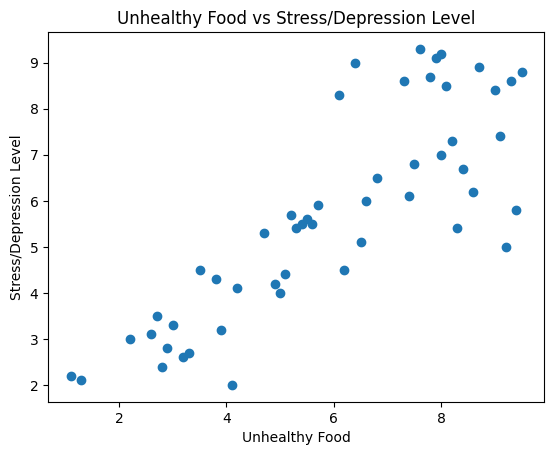

In [ ]:
plt.scatter(Unhealthy_Food,Stress_Depression_Level)
plt.xlabel("Unhealthy Food")
plt.ylabel("Stress/Depression Level")
plt.title("Unhealthy Food vs Stress/Depression Level")

### ***INSIGHTS FROM SCATTER PLOT***
- From the above scatter plot,it is clear that is also a positive correlation between Unhealthy food and level of stress/depression in an individual.This suggests that as consumption of unhealthy food increases the level of stress/depression also increases.
***

## ***Visualizing the correlation between feature variable "Financial Constraints" and target variable "Stress/Depression level"***

Text(0.5, 1.0, 'Financial Constraints vs Stress/Depression Level')

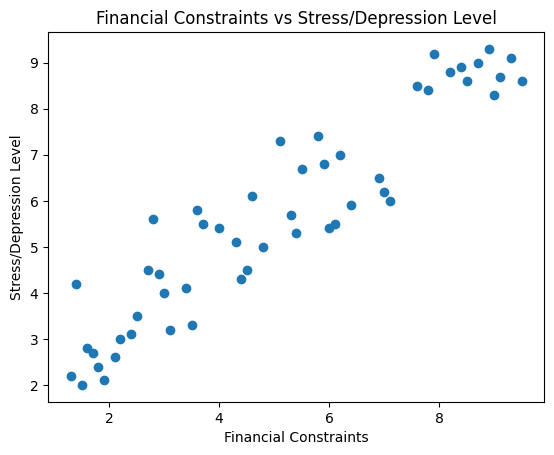

In [ ]:
plt.scatter(financial_constraints,Stress_Depression_Level)
plt.xlabel("Financial Constraints")
plt.ylabel("Stress/Depression Level")
plt.title("Financial Constraints vs Stress/Depression Level")

### ***INSIGHTS FROM PLOT***
- The scatter plot of Financial Constraints vs Stress/Depression Level also shows a positive correlation, similar to the Work_Life and Unhealthy_Food plots. This tells that financial constraints also contribute to increased stress and depression levels.
***

## ***Visualizing the correlation between feature variable "Sleeplessness" and target variable "Stress/Depression level"***

Text(0.5, 1.0, 'Sleeplessness_Insomnia vs Stress/Depression Level')

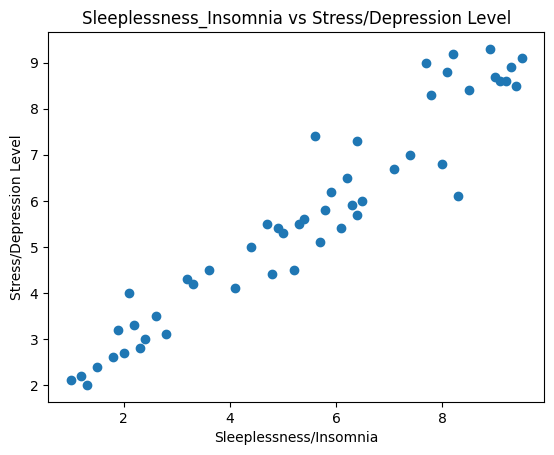

In [ ]:
plt.scatter(Sleeplessness_Insomnia,Stress_Depression_Level)
plt.xlabel("Sleeplessness/Insomnia")
plt.ylabel("Stress/Depression Level")
plt.title("Sleeplessness_Insomnia vs Stress/Depression Level")

### ***INSIGHTS FROM SCATTER***
- The scatter plot of Sleeplessness vs Stress/Depression Level again also shows a positive correlation, similar to the Work_Life and Unhealthy_Food and financial constraints plots. This tells that lack of proper sleep also contribute to increased stress and depression levels.

***

## ***Generating heatmap to observe correlation***

In [ ]:
corr=df.corr()

<Axes: >

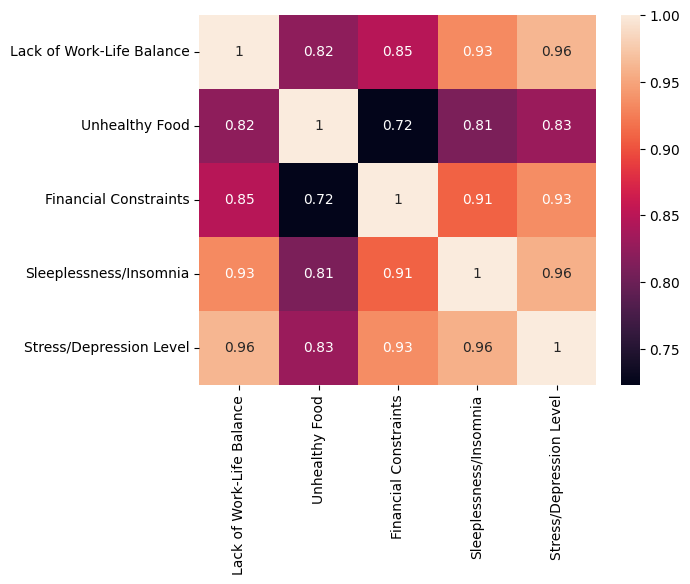

In [ ]:
sns.heatmap(corr,annot=True)

### ***INSIGHTS FROM HEATMAP***
- By observing the correlation between 3 input feature varialbes and target variable, we can see that Unhealthy food shows least correlation (0.83) compared to other three features i.e lack of work-life balance (0.96),Financial Constraints(0.93) and Sleeplessness(0.96).Therefore in feature engineering step,feature "Unhealthy food" can be discarded.

***
## ***Preparing data for Machine learning model***

In [ ]:
X=df.drop(['Stress/Depression Level'],axis=1)
y=df['Stress/Depression Level']

### ***Splitting the data into train and test data***

In [ ]:
# Keeping the ratio of train/test to be 80% and 20%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


***
## ***Training the model***

In [ ]:
lr=linear_model.LinearRegression()

In [ ]:
model=lr.fit(X_train,y_train)

### ***Predicting the target variable***

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([7.03169794, 4.19202185, 7.23888144, 8.94386457, 8.83391028,
       5.1197899 , 7.06929637, 6.43900022, 3.11997925, 7.56089213,
       8.74845187])

***
## ***MODEL EVALUATION***

### ***R2_SCORE***

In [ ]:
R2=r2_score(y_test,y_pred)
print(" R2 score of our model is:",R2)

 R2 score of our model is: 0.9568956916206901


### ***Mean Squared Error***

In [ ]:
mse=mean_squared_error(y_test,y_pred)
print(" Mean Squared Error of our model is:",mse)

 Mean Squared Error of our model is: 0.13685796027407673


### ***Mean Absolute Error***

In [ ]:
mse=mean_absolute_error(y_test,y_pred)
print(" Mean Absolute Error of our model is:",mse)

 Mean Absolute Error of our model is: 0.3014105287880923


### ***Root Mean Squared Error***

In [ ]:
rmse=root_mean_squared_error(y_test,y_pred)
print(" Root Mean Squared Error of our model is:",rmse)

 Root Mean Squared Error of our model is: 0.3699431851975067


***
## ***Discussion regarding Model performance***

- ***R² Score: 0.9569***
- An R² score of our model is approximately 0.95,which shows that about 95.7% of the variability in stress or depression levels is explained by the input variables (lack of work-life balance, unhealthy food, financial constraints, and sleeplessness/insomnia).
- This tells a strong fit between the model and the data, shows the feature variables are capturing the underlying patterns related to mental health issues effectively.


***
- ***Mean Squared Error (MSE): 0.1369***

- The MSE quantifies the average of the squares of the errors (the average squared difference between the predicted and actual values).
- A lower MSE of our model shows better model performance.Which suggests that the predictions made by our model are close to the actual values.

***

- ***Mean Absolute Error (MAE): 0.3014***

- The MAE measures the average absolute errors between predicted and actual values.It gives a straightforward interpretation of prediction accuracy.
- A MAE of 0.3014 indicates that, on average, the model's predictions are off by about 0.30 units on the scale used for stress or depression levels.

***
- ***Root Mean Squared Error (RMSE): 0.3699***

- The RMSE is the square root of the MSE, providing error measurement in the same units as the target variable. A RMSE of approximately 0.37 suggests that there is a moderate level of prediction error.



***
## ***Summary***
In summary, the high R² score indicates a strong relationship between the feature variables and the target variable, suggesting effective use of the model for understanding stress and depression. The other metrics (MSE, MAE, and RMSE) also show that the model’s predictions are quite accurate. Stakeholders can use these insights to prioritize health initiatives focused on improving work-life balance, dietary habits, financial management, and sleep quality to reduce stress and depression in populations.

***
